In [1]:
# Load libraries
import json
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

os.getcwd()

'C:\\Users\\David Olivero\\AnacondaProjects\\springboard\\Springboard'

In [6]:
# The file is a json object that holds login information. We load it and convert it to a Pandas DataFrame.
file1 = 'logins.json'

# Opening JSON file 
with open(file1, 'r') as openfile: 
  
    # Reading from json file 
    json_object = json.load(openfile) 
  
logins = pd.DataFrame(json_object)

In [7]:
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
# We see that we need to convert the time info into a datetime object
logins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   login_time  93142 non-null  object
dtypes: object(1)
memory usage: 727.8+ KB


In [11]:
logins['login_time'] = pd.to_datetime(logins['login_time'])

In [24]:
# Further we wish the datetime info to be the index, and assign a counter (=1) for each login.
logins.index = logins['login_time']
logins['count'] = 1
logins = logins.drop(columns=['login_time'])

In [25]:
logins.head()

,count
login_time,
1970-01-01 20:13:18,1
1970-01-01 20:16:10,1
1970-01-01 20:16:37,1
1970-01-01 20:16:36,1
1970-01-01 20:26:21,1


In [28]:
# Now we can use Grouper function to aggregate the logins by 15 minute intervals:
agg_15m = logins['count'].groupby(pd.Grouper(freq='15Min')).aggregate(np.sum)

In [29]:
# The resulting pandas series looks like this:
agg_15m.head()

login_time
1970-01-01 20:00:00    2
1970-01-01 20:15:00    6
1970-01-01 20:30:00    9
1970-01-01 20:45:00    7
1970-01-01 21:00:00    1
Freq: 15T, Name: count, dtype: int64

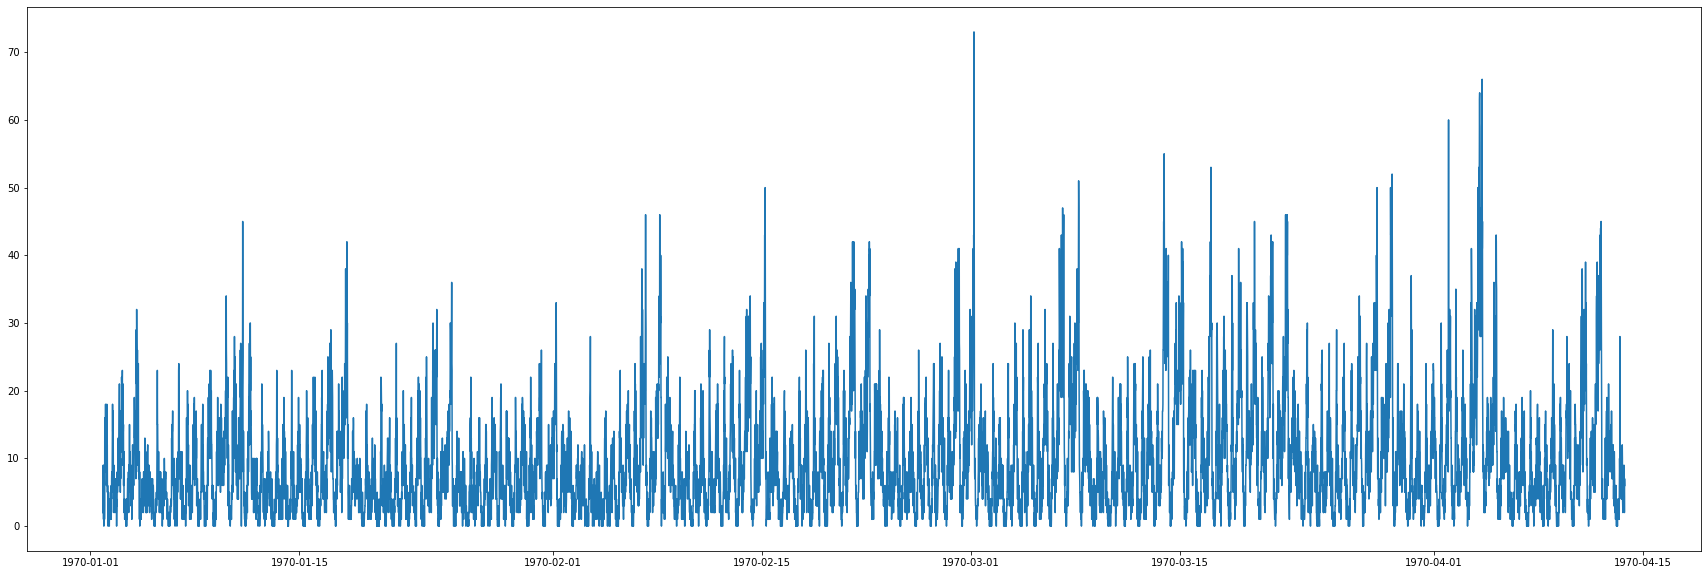

In [37]:
# The variation in logins counts over time looks like this:

plt.figure(figsize=(30,10))
plt.plot(agg_15m)
plt.show()

In [31]:
import scipy.fftpack

In [40]:
y = scipy.fftpack.rfft(agg_15m)

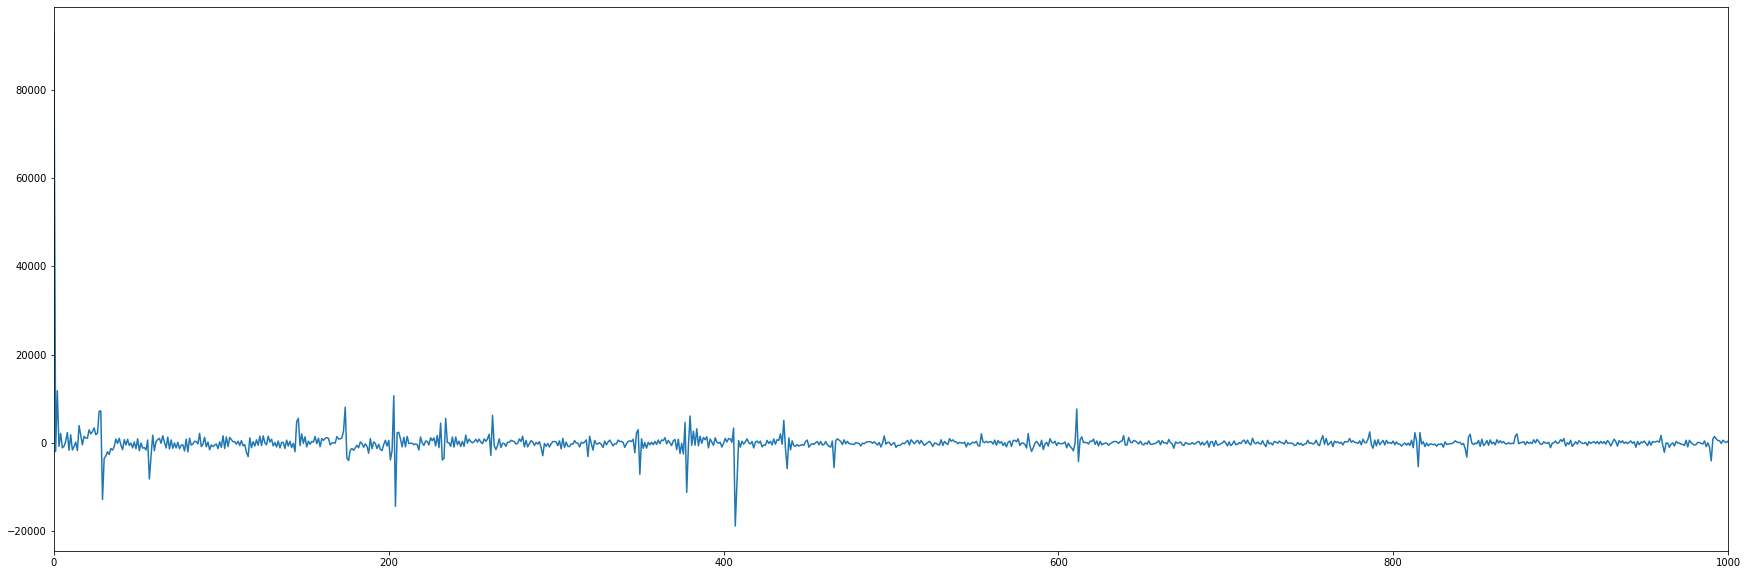

In [41]:
plt.figure(figsize=(30,10))
plt.plot(y)
plt.xlim(0,1000)
plt.show()

In [42]:
file2 = 'ultimate_data_challenge.json'

# Opening JSON file 
with open(file2, 'r') as openfile: 
  
    # Reading from json file 
    json_object = json.load(openfile) 
  
udc = pd.DataFrame(json_object)

In [43]:
udc.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [44]:
udc.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [45]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [46]:
# Some house cleaning:
udc.city = udc.city.astype('category')
udc.phone = udc.phone.astype('category')
udc['signup_date'] = pd.to_datetime(udc['signup_date'])
udc['last_trip_date'] = pd.to_datetime(udc['last_trip_date'])

In [47]:
end_date = max(udc['last_trip_date'])

In [48]:
end_date

Timestamp('2014-07-01 00:00:00')

In [60]:
udc['Last_time'] = (end_date - udc['last_trip_date'])

In [63]:
udc.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50,100,80,82.4


In [65]:
udc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   city                    50000 non-null  category       
 1   trips_in_first_30_days  50000 non-null  int64          
 2   signup_date             50000 non-null  datetime64[ns] 
 3   avg_rating_of_driver    41878 non-null  float64        
 4   avg_surge               50000 non-null  float64        
 5   last_trip_date          50000 non-null  datetime64[ns] 
 6   phone                   49604 non-null  category       
 7   surge_pct               50000 non-null  float64        
 8   ultimate_black_user     50000 non-null  bool           
 9   weekday_pct             50000 non-null  float64        
 10  avg_dist                50000 non-null  float64        
 11  avg_rating_by_driver    49799 non-null  float64        
 12  Last_time               50000 no

In [68]:
udc.Last_time = udc.Last_time.days

AttributeError: 'Series' object has no attribute 'days'

In [70]:
l = udc['Last_time']
udc['retained'] = [1  if x.days <= 30 else 0 for x in l]

In [71]:
udc.head().T

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25 00:00:00,2014-01-29 00:00:00,2014-01-06 00:00:00,2014-01-10 00:00:00,2014-01-27 00:00:00
avg_rating_of_driver,4.7,5,4.3,4.6,4.4
avg_surge,1.1,1,1,1.14,1.19
last_trip_date,2014-06-17 00:00:00,2014-05-05 00:00:00,2014-01-07 00:00:00,2014-06-29 00:00:00,2014-03-15 00:00:00
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0,0,20,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50,100,80,82.4


In [73]:
udc.city.unique()

[King's Landing, Astapor, Winterfell]
Categories (3, object): [King's Landing, Astapor, Winterfell]

In [84]:
# So how many of the riders have been retained? 

print("{:.2f}".format(udc.retained.sum()/len(udc)*100), 'percent of riders have been retained.')

37.61 percent of riders have been retained.


In [86]:
import seaborn as sns

In [95]:
# Overall it appears that much higher retention is seen in King's Landing. 
# Further, retention is very bad in Astapor. 

udc.groupby(['city','retained']).count()['phone']

city            retained
Astapor         0           12215
                1            4198
King's Landing  0            3741
                1            6325
Winterfell      0           14977
                1            8148
Name: phone, dtype: int64

In [96]:
# Retention seems much worse with Android compared to iPhone - perhaps a software issue on Android?

udc.groupby(['phone','retained']).count()['city']

phone    retained
Android  0           11876
         1            3146
iPhone   0           19057
         1           15525
Name: city, dtype: int64

In [102]:
# Ultimate Black users were 50% likely to be retained, while non-users were less than 30% likely to be retained.

udc.groupby(['ultimate_black_user','retained']).count()['city']

ultimate_black_user  retained
False                0           21839
                     1            9307
True                 0            9357
                     1            9497
Name: city, dtype: int64

In [97]:
udc.groupby(['retained']).describe()['weekday_pct']

,count,mean,std,min,25%,50%,75%,max
retained,,,,,,,,
0,31196.0,60.647032,40.982688,0.0,16.7,69.6,100.0,100.0
1,18804.0,61.389034,29.487584,0.0,44.4,64.3,84.6,100.0


In [98]:
udc.groupby(['retained']).describe()['surge_pct']

,count,mean,std,min,25%,50%,75%,max
retained,,,,,,,,
0,31196.0,8.666739,22.179139,0.0,0.0,0.0,0.0,100.0
1,18804.0,9.152797,15.588704,0.0,0.0,0.0,13.3,100.0


In [99]:
udc.groupby(['retained']).describe()['avg_rating_of_driver']

,count,mean,std,min,25%,50%,75%,max
retained,,,,,,,,
0,24706.0,4.607557,0.664418,1.0,4.4,5.0,5.0,5.0
1,17172.0,4.592930,0.542386,1.0,4.3,4.8,5.0,5.0


In [100]:
# Interestingly, it seems like retained riders took more trips in the first 30 days. 

udc.groupby(['retained']).describe()['trips_in_first_30_days']

,count,mean,std,min,25%,50%,75%,max
retained,,,,,,,,
0,31196.0,1.658482,2.654222,0.0,0.0,1.0,2.0,73.0
1,18804.0,3.306318,4.986743,0.0,0.0,2.0,4.0,125.0


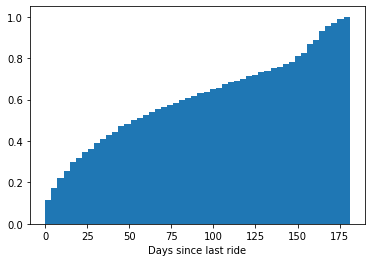

In [108]:
plt.hist([x.days for x in l], bins=50, density=True, cumulative=True)
plt.xlabel('Days since last ride')
plt.show()

In [109]:
udc['first_to_last'] = udc['last_trip_date'] - udc['signup_date']

In [110]:
udc['six_months'] = [1 if x.days >= 180 else 0 for x in udc['first_to_last']]

In [111]:
print("{:.2f}".format(udc.six_months.sum()/len(udc)*100), 'percent of riders are still active 6 months in.')

0.17 percent of riders are active 6 months in.


In [112]:
udc['first_to_last'].describe()

count                      50000
mean     92 days 18:57:44.640000
std      62 days 03:06:56.580842
min              0 days 00:00:00
25%             27 days 00:00:00
50%            110 days 00:00:00
75%            150 days 00:00:00
max            181 days 00:00:00
Name: first_to_last, dtype: object